In [7]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit as timeit
from random import randrange

In [8]:
cleveland = pd.read_csv("./cleveland.csv")
framingham = pd.read_csv("./framingham.csv")

In [4]:
# Display the head of the Cleveland dataset.
cleveland.head()

# Explanation of all columns for the Cleveland dataset, extracted from where the original dataset was downloaded.
# We are exploring where we can potentially merge two datasets.

# * Can merge with 'age'
# * Can merge with 'sex' (1 = male; 0 = female)
# 9 cp: Chest pain type
#    - Value 1: Typical angina
#    - Value 2: Atypical angina
#    - Value 3: Non-anginal pain
#    - Value 4: Asymptomatic
# * Can merge with 'trestbps' (resting blood pressure in mm Hg on admission to the hospital)
# * Can merge with 'chol' (serum cholestoral in mg/dl)
# 15 years: Number of years as a smoker
# 16 fbs: (fasting blood sugar > 120 mg/dl)
#    - 1 = True
#    - 0 = False
# 19 restecg: Resting electrocardiographic results
#    - Value 0: Normal
#    - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#    - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
# * Can merge with 'thalach' (maximum heart rate achieved)
# 38 exang: Exercise-induced angina
#    - 1 = Yes
#    - 0 = No
# 40 oldpeak: ST depression induced by exercise relative to rest
# 41 slope: The slope of the peak exercise ST segment
#    - Value 1: Upsloping
#    - Value 2: Flat
#    - Value 3: Downsloping
# 44 ca: Number of major vessels (0-3) colored by fluoroscopy
# * Can merge with 'thal' (3 = normal; 6 = fixed defect; 7 = reversible defect)
# * Can merge with 'num' (diagnosis of heart disease, angiographic disease status)
#    - Value 0: < 50% diameter narrowing
#    - Value 1: > 50% diameter narrowing
#    - Can potentially merge datasets based on this column.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
cleveland.shape

(1025, 14)

In [6]:
# Display the head of the Framingham dataset.

framingham.head()

# * Can merge with 'age'
# * Can merge with 'male' (0 – female, 1 - male)
# education (seems irrelevant)
# * Can merge with 'currentSmoker' (0 – non-smoker, 1 - smoker)
# cigsPerDay
# BPMeds (medications for high blood pressure, 0 – not taking, 1 - taking)
# prevalentStroke (whether the person has had a stroke before, 0/1)
# prevalentHyp (whether the person has had high blood pressure before, 0/1)
# diabetes (0 – doesn't have, 1 - has)
# totChol (total cholesterol level in mg/dL)
# sysBP (systolic blood pressure in mmHg)
# diaBP (diastolic blood pressure in mmHg)
# BMI (“Body Mass Index” = weight/height)
# heartRate (heart rate in beats per minute)
# glucose (glucose level in mg/dL)
# * Can merge with 'mozeTenYearCHD' (target)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
framingham.shape

(4240, 16)

In [11]:
# Merging two datasets
framingham = framingham.rename(columns={'male': 'sex', 'TenYearCHD': 'target'})
data = pd.merge(cleveland, framingham)


In [12]:
data = data.reindex(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'education',
       'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'target'])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,52,1,0,125,212,0,1,168,0,1.0,...,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
1,52,1,0,125,212,0,1,168,0,1.0,...,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
2,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,240.0,94.0,66.5,22.93,70.0,88.0,0
3,52,1,0,125,212,0,1,168,0,1.0,...,0,1,1,240.0,146.0,89.0,24.59,64.0,73.0,0
4,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,215.0,129.0,80.0,29.29,70.0,87.0,0


In [13]:
data.isna().sum() # Checking for the presence of NaN (Not-a-Number) values in the dataset


age                   0
sex                   0
cp                    0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalach               0
exang                 0
oldpeak               0
slope                 0
ca                    0
thal                  0
education           715
currentSmoker         0
cigsPerDay          190
BPMeds              319
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol             232
sysBP                 0
diaBP                 0
BMI                  62
heartRate            10
glucose            1862
target                0
dtype: int64

In [14]:
data = data.dropna()  # Dropping columns containing NaN data
data.isna().sum()    # Checking for NaN values again


age                0
sex                0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
target             0
dtype: int64

In [15]:
data = data.reset_index(drop=True)  # Resetting the index for clarity


In [16]:
data.nunique() # We are checking how many different types of values exist in each column.


age                  34
sex                   2
cp                    4
trestbps             48
chol                148
fbs                   2
restecg               3
thalach              88
exang                 2
oldpeak              38
slope                 3
ca                    5
thal                  4
education             4
currentSmoker         2
cigsPerDay           31
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             230
sysBP               213
diaBP               133
BMI                1038
heartRate            63
glucose             128
target                2
dtype: int64

In [17]:
import seaborn as sns  # Used for visualization
bg_color = (0.25, 0.25, 0.25)  # MODIFY THIS COLOR
sns.set(rc={
    "font.style": "normal",
    "axes.facecolor": bg_color,
    "figure.facecolor": bg_color,
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "axes.labelcolor": "white",
    "axes.grid": False,
    'axes.labelsize': 25,
    'figure.figsize': (10.0, 5.0),
    'xtick.labelsize': 15,
    'ytick.labelsize': 15
})


<Axes: >

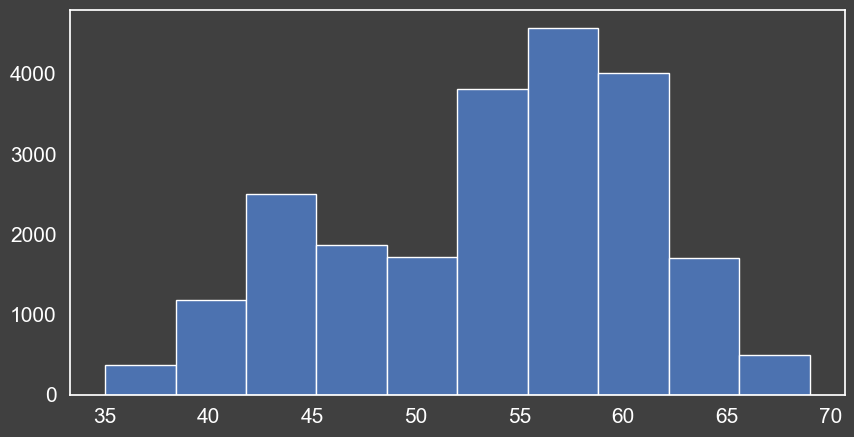

In [18]:
data['age'].hist(grid=False)  # Checking when people most commonly develop heart diseases.


<Axes: >

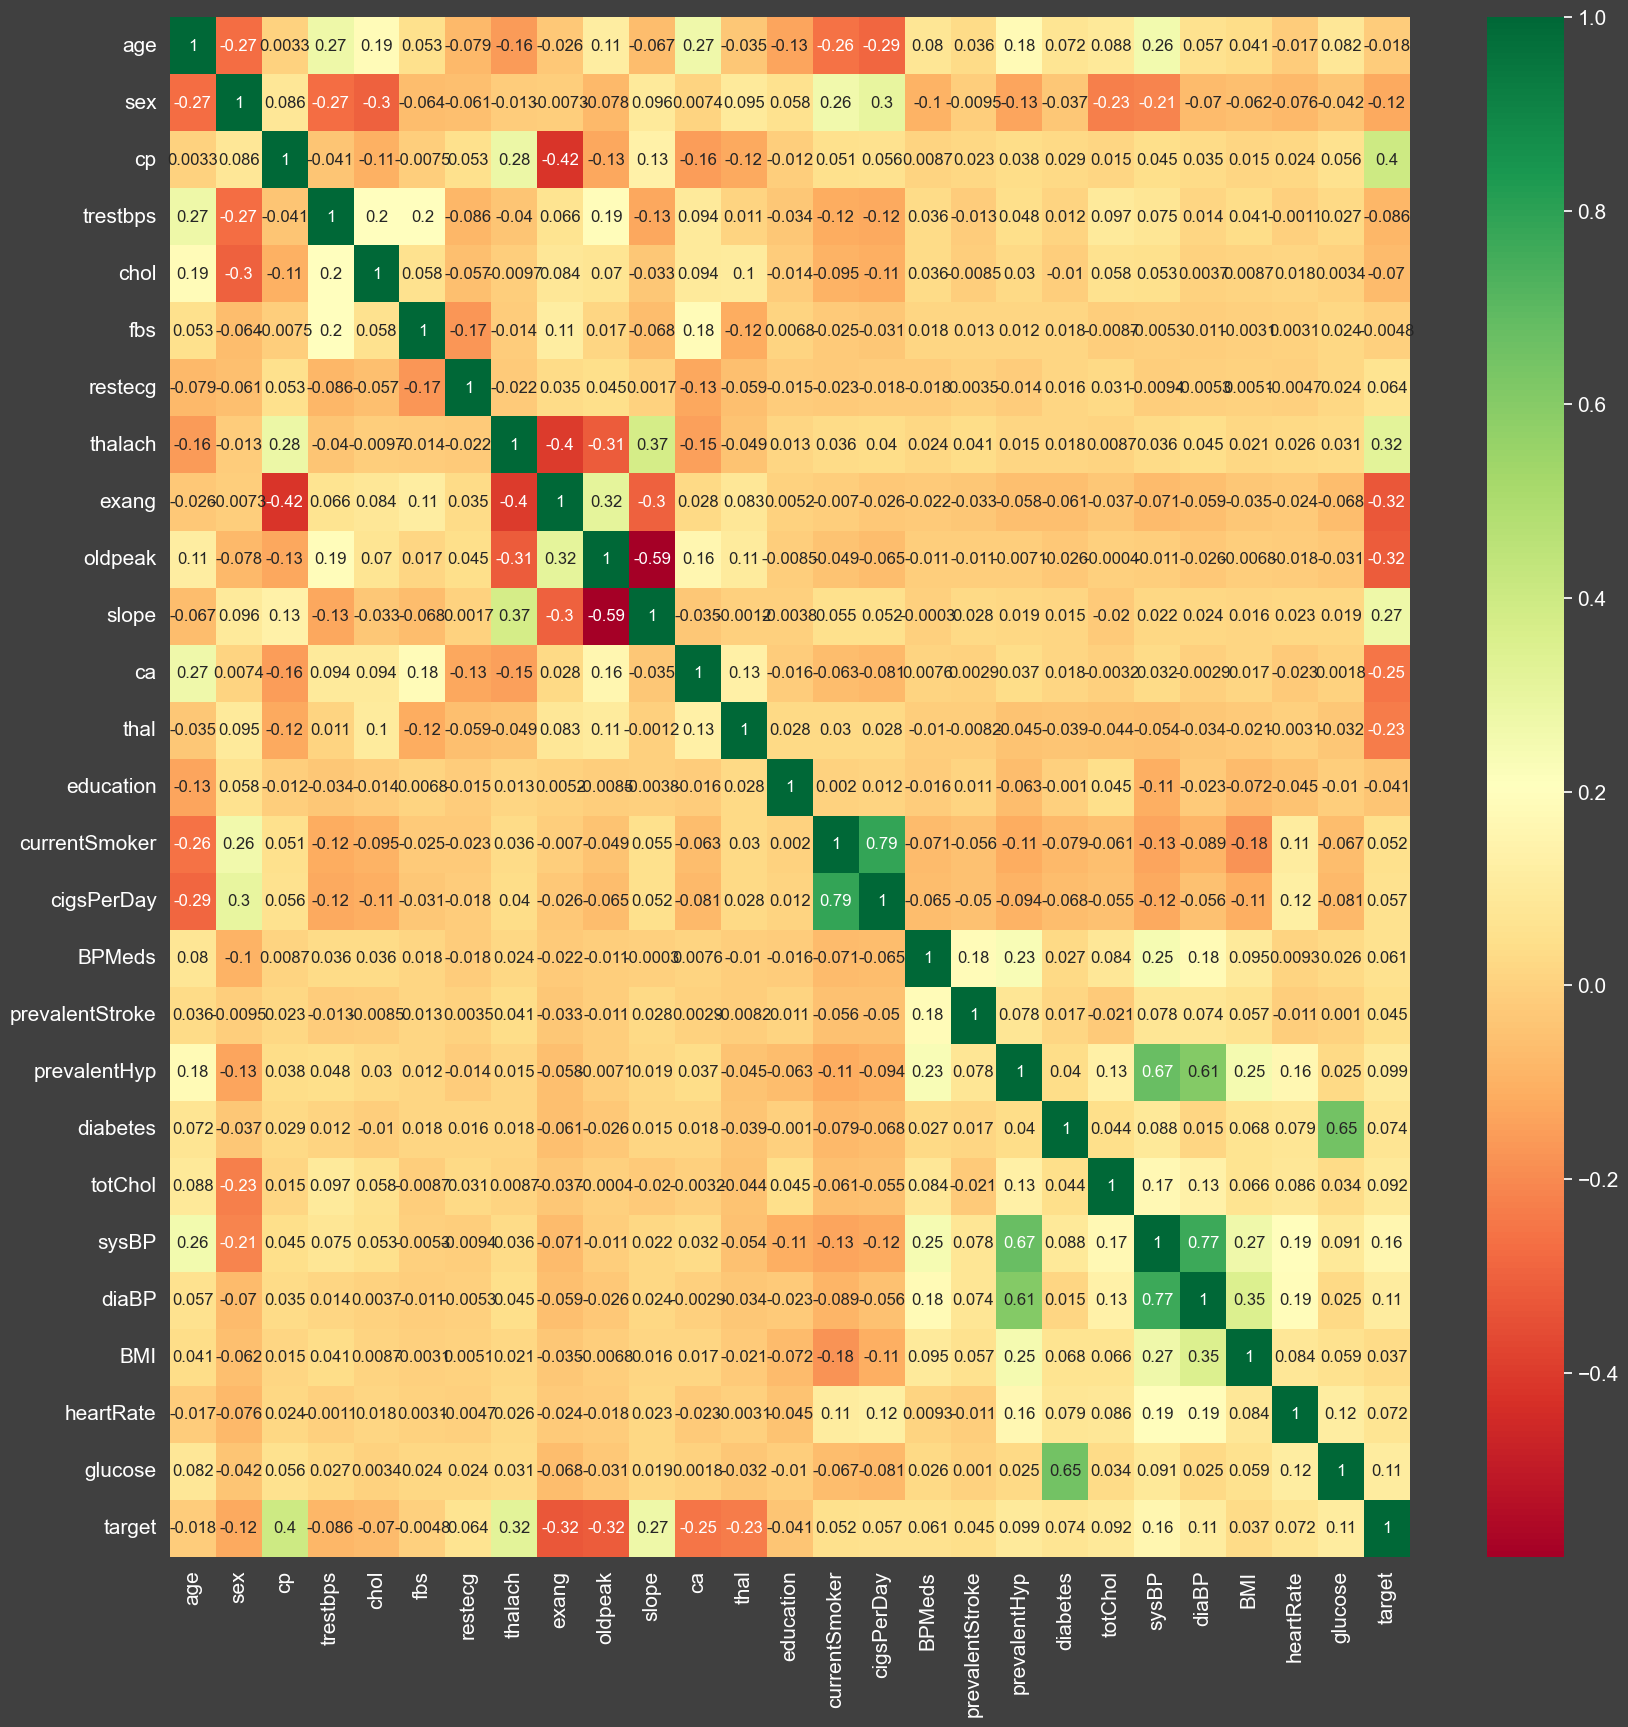

In [17]:
# First method to check the importance of data: Correlation Matrix
X = data.iloc[:, 0:26]  # Independent variables
y = data.iloc[:, -1]    # Target variable
corrmat = data.corr()  # Calculate correlations between all columns
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:, 0:26]  # Independent variables
y = data.iloc[:, -1]    # Target variable
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(15, 'Score'))  # Top 15 features with the highest scores


         Specs        Score
7      thalach  7986.289565
2           cp  5380.835387
9      oldpeak  2704.569508
25     glucose  2449.369505
21       sysBP  2026.507289
11          ca  1640.880739
20     totChol  1417.011352
8        exang  1224.265396
4         chol  1190.853017
15  cigsPerDay  1174.455195
10       slope   489.832899
22       diaBP   450.942169
3     trestbps   415.004804
12        thal   226.463292
24   heartRate   209.456043


[0.07098205 0.04444209 0.12403908 0.07185891 0.06715591 0.0303251
 0.04109785 0.09031068 0.06827239 0.07925758 0.06204964 0.10380293
 0.09184645 0.00321337 0.00414465 0.00441963 0.00175991 0.00086023
 0.00381537 0.00244853 0.00490586 0.00838786 0.00571459 0.00399996
 0.00402542 0.00686397]


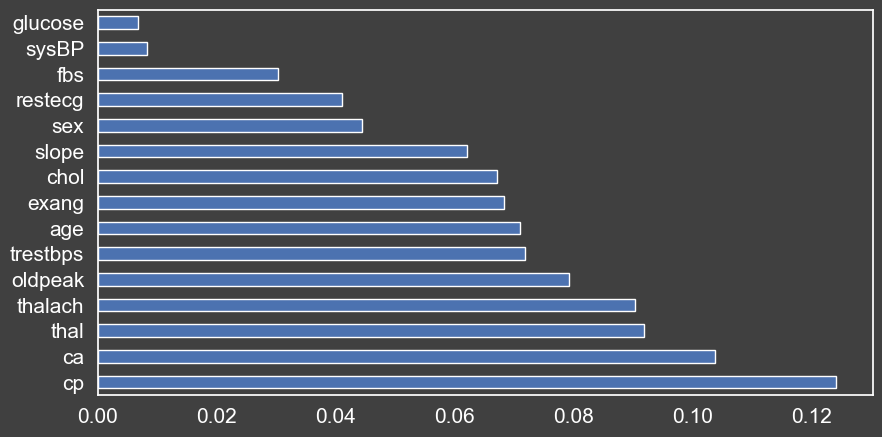

In [20]:
# Third method: Feature Importance

X = data.iloc[:, 0:26]  # Independent variables
y = data.iloc[:, -1]    # Target variable
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()


In [20]:
# Using three different methods for feature selection, we can see that they don't all yield the same results.
# Based on personal preference, we will rely on the last method.


In [21]:
clear_data = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'sysBP', 'diaBP', 'target']]
# dropped: education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes
# totChol, bmi, heartRate, glucose

In [22]:
clear_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sysBP,diaBP,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,141.5,89.0,0
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,160.0,98.0,0
2,52,1,0,125,212,0,1,168,0,1.0,2,2,3,94.0,66.5,0
3,52,1,0,125,212,0,1,168,0,1.0,2,2,3,146.0,89.0,0
4,52,1,0,125,212,0,1,168,0,1.0,2,2,3,129.0,80.0,0


In [23]:
clear_data.shape  # The data is now clean.


(22219, 16)

In [24]:
clear_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
sysBP       float64
diaBP       float64
target        int64
dtype: object

C:\Users\d2z3l\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\d2z3l\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\d2z3l\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


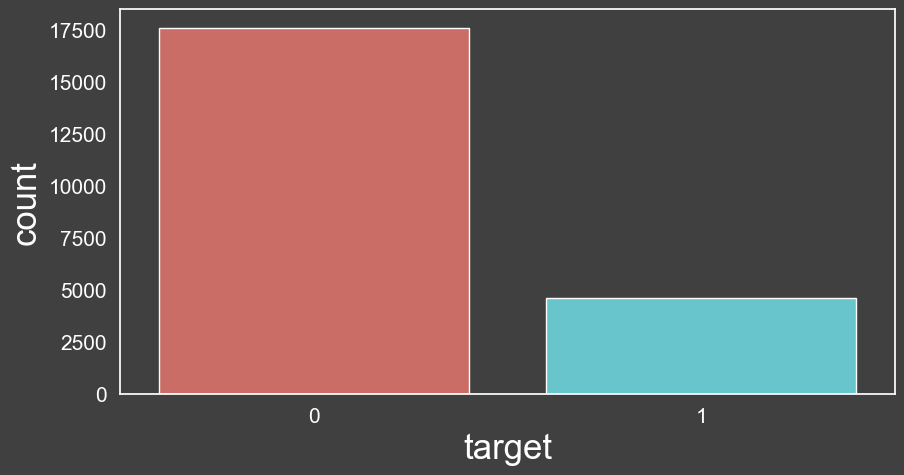

In [25]:
clear_data['target'].value_counts()
sns.countplot(x='target'
, data=clear_data, palette = 'hls')
plt.show()

In [26]:
clear_data_list = clear_data.values.tolist()

In [27]:
%%time
# Scikit version of a algorithm:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lReg = LogisticRegression()
X = pd.DataFrame(clear_data.iloc[:,:-1])
y = pd.DataFrame(clear_data.iloc[:,-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
lReg = LogisticRegression()
lReg.fit(X_train, y_train)
y_pred = lReg.predict(X_test)
print('Acc: ', (lReg.score(X_test, y_test))*100, '%')

Acc:  86.25112511251125 %
CPU times: total: 15.6 ms
Wall time: 129 ms


C:\Users\d2z3l\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d2z3l\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = clear_data.drop('target', axis=1)
y = clear_data['target']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


C:\Users\d2z3l\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5308
           1       0.74      0.61      0.67      1358

    accuracy                           0.88      6666
   macro avg       0.82      0.78      0.80      6666
weighted avg       0.87      0.88      0.87      6666

Confusion Matrix:
[[5025  283]
 [ 536  822]]


In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clear_data.drop('target', axis=1), clear_data['target'], test_size=0.2, random_state=42)

# Create a dictionary to store model results
model_results = {}

# Define and evaluate multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    model_results[name] = accuracy

# Display model accuracy
for name, accuracy in model_results.items():
    print(f"{name}: {accuracy:.2f}")

# Select the best-performing model for further tuning
best_model_name = max(model_results, key=model_results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# You can now proceed with hyperparameter tuning and cross-validation for the best model.


C:\Users\d2z3l\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.88
Decision Tree: 1.00
Random Forest: 1.00
Support Vector Classifier: 0.80
K-Nearest Neighbors: 0.98
Naive Bayes: 0.83
Best Model: Decision Tree


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model with a maximum depth of 10 (you can adjust this)
dt_model = DecisionTreeClassifier(max_depth=5)

# Fit the model to your training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [33]:
# Identify feature importance
feature_importance = dt_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")


age: 0.07410008934251225
sex: 0.11368648412823425
cp: 0.35239444263999453
trestbps: 0.047942803709851656
chol: 0.13494187531417615
fbs: 0.0
restecg: 0.0
thalach: 0.06836722021352394
exang: 0.0
oldpeak: 0.06394674217864457
slope: 0.0
ca: 0.14462034247306266
thal: 0.0
sysBP: 0.0
diaBP: 0.0


In [34]:
# Select features with importance scores greater than 0.1
selected_features = ['age', 'cp', 'chol', 'thalach', 'ca']

# Create a new dataset with selected features and target
selected_data = clear_data[selected_features + ['target']]


In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(selected_data.drop('target', axis=1), selected_data['target'], test_size=0.2, random_state=42)


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'max_depth': [ 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_params)


Best Hyperparameters for Decision Tree: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train a Decision Tree classifier with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy with Best Hyperparameters:", accuracy)

# Print a classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Decision Tree Accuracy with Best Hyperparameters: 0.8836633663366337
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3537
           1       0.74      0.67      0.70       907

    accuracy                           0.88      4444
   macro avg       0.83      0.80      0.81      4444
weighted avg       0.88      0.88      0.88      4444

Confusion Matrix:
[[3323  214]
 [ 303  604]]
